# Project 1 IRWA

In [3]:
# Standard library imports
import math
import os
import sys
import time
from collections import defaultdict
from array import array

# Third-party imports
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from numpy import linalg as la
try:
    nltk.data.find('corpora/stopwords.zip')
except LookupError:
    nltk.download('stopwords')

# Local application
current_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in locals() else os.getcwd()
project_root = os.path.join(current_dir, '..')
if project_root not in sys.path:
    sys.path.append(project_root)
import irwa.loading as ild  
import irwa.build_index as ibi

### Load the tweets

In [4]:
file_path = '../data/farmers-protest-tweets.json'
tweets = ild.load_all_tweets(file_path)
print(f"Loaded {len(tweets)} tweets")

Loaded 117407 tweets


In [5]:
tweet_document_ids_map_df = pd.read_csv("../data/tweet_document_ids_map.csv")
index, tweet_index = ibi.create_index(tweets)

#Testing
print("First 10 Index results for the term 'world': \n{}".format(index['world'][:10]))

First 10 Index results for the term 'world': 
[[1364506249291784198, array('I', [0])], [1364499669271855104, array('I', [12])], [1364497821953495052, array('I', [7])], [1364492295626752000, array('I', [6])], [1364482218228334596, array('I', [0])], [1364474962380091395, array('I', [3])], [1364467283423338496, array('I', [3])], [1364450375680610304, array('I', [3])], [1364446733711761411, array('I', [7])], [1364445818757939201, array('I', [22])]]


### Exploratory Data Analysis

In [6]:
import pandas as pd
import re
import nltk
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from itertools import chain
from statistics import mean
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Word Count

In [7]:
def word_count(tweet_index, top_words):
    """
    Perform word count on the tweet content stored in tweet_index.

    Arguments:
    tweet_index -- dictionary mapping tweet IDs to tweet content

    Returns:
    word_counts -- Counter object with word frequencies
    most_common_words -- list of tuples with the most common words and their frequencies
    """

    # Step 1: Preprocess each tweet's content to get the terms (words)
    tweet_terms = [ibi.build_terms(content) for content in tweet_index.values()]

    # Step 2: Flatten the list of lists into a single list of words
    all_words = list(chain.from_iterable(tweet_terms))

    # Step 3: Count the frequency of each word
    word_counts = Counter(all_words)

    # Step 4: Get the 10 most common words
    most_common_words = word_counts.most_common(top_words)

    return word_counts, most_common_words



def plot_word_counts(most_common_words):
    """
    Create a horizontal bar plot for the most common words with counts.

    Arguments:
    word_counts -- Counter object with word frequencies
    most_common_words -- list of tuples with the most common words and their frequencies
    """
    most_common_words.sort(key=lambda x: x[1], reverse=True)
    words, counts = zip(*most_common_words)  # Unzip the list of tuples

    # Normalize counts for color gradient
    norm_counts = np.array(counts) / max(counts)

    # Create a horizontal bar plot
    plt.figure(figsize=(10, 6 + len(most_common_words) * 0.25))  # Adjust height based on number of words
    bars = plt.barh(words, counts, color=plt.cm.Blues(norm_counts))

    # Add labels to bars
    for bar, count in zip(bars, counts):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(count), 
                 ha='left', va='center', fontsize=10)

    plt.title('Most Common Words in Tweets')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()



c:\Users\Usuari\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Usuari\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Usuari\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Usuari\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Usuari\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.p

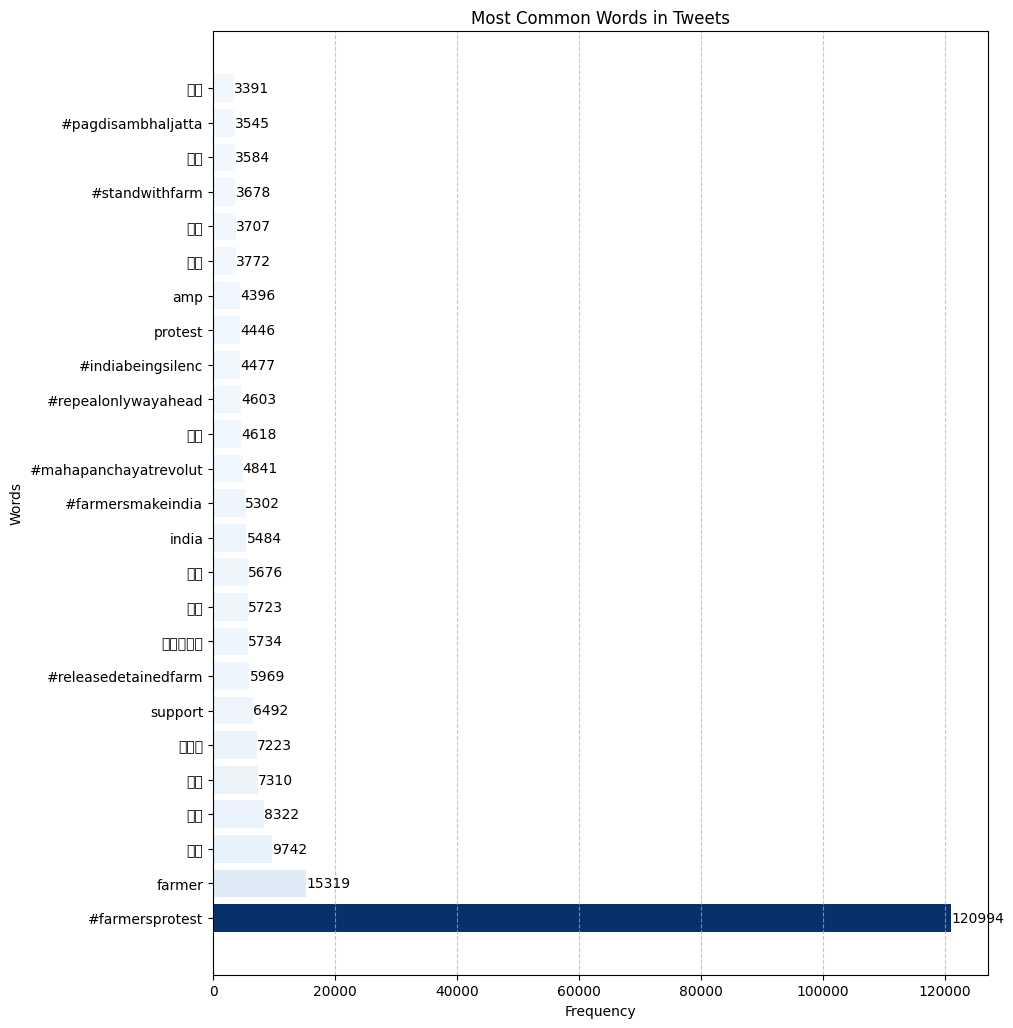

In [8]:
# Example usage
word_counts, most_common_words = word_count(tweet_index, 25)
plot_word_counts(most_common_words)

Average Sentence Length

In [9]:
def average_sentence_length(tweet_index):
    sentence_lengths = []

    for content in tweet_index.values():
        sentences = nltk.sent_tokenize(content)  # Tokenize into sentences
        words = nltk.word_tokenize(content)  # Tokenize into words
        avg_length = len(words) / len(sentences) if len(sentences) > 0 else 0
        sentence_lengths.append(avg_length)
    
    avg_sentence_length = mean(sentence_lengths)  # Compute overall average
    return avg_sentence_length

avg_sentence_length = average_sentence_length(tweet_index)

print(f"📊 Average Sentence Length")
print(f"-----------------------------------")
print(f"The average sentence length is {avg_sentence_length:.2f} words")


📊 Average Sentence Length
-----------------------------------
The average sentence length is **16.95 words**


Vocabulary Size

In [37]:
def rank_tweets_by_retweets(tweets):
    ranked_tweets = sorted(tweets, key=lambda tweet: tweet._retweet_count, reverse=True)
    top_retweets = [(tweet._tweet_id, tweet._retweet_count) for tweet in ranked_tweets[:10]]  # Top 10 retweeted tweets
    return top_retweets

top_retweeted_tweets = rank_tweets_by_retweets(tweets)
print("Top 10 most retweeted tweets:", top_retweeted_tweets)


def plot_top_retweeted_tweets(top_retweeted_tweets):
    """
    Plot a horizontal bar chart of the top retweeted tweets.

    Arguments:
    top_retweeted_tweets -- list of tuples containing tweet IDs and their retweet counts
    """
    
    # Check if the input list is empty
    if not top_retweeted_tweets:
        print("No tweets to display.")
        return
    
    # Unzip the tweet IDs and retweet counts
    tweet_ids, retweet_counts = zip(*top_retweeted_tweets)
    tweet_ids = list(map(str, tweet_ids))  # Convert tweet IDs to string if necessary

    # Create a horizontal bar plot
    plt.figure(figsize=(10, 6))
    bars = plt.barh(tweet_ids, retweet_counts, color='skyblue')

    # Add labels to the bars
    for bar, count in zip(bars, retweet_counts):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, str(count), 
                 va='center', ha='left', fontsize=10)

    plt.title('Top 10 Most Retweeted Tweets')
    plt.xlabel('Number of Retweets')
    plt.ylabel('Tweet IDs')
    plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for better readability
    plt.tight_layout()
    plt.show()

# Example usage
plot_top_retweeted_tweets(top_retweeted_tweets)



Top 10 most retweeted tweets: [(1360169510079111173, 7723), (1364148079117615105, 6164), (1360882069161803779, 4673), (1360908603155050498, 3742), (1360162861419425795, 3332), (1361790921902338048, 3230), (1360260269646237699, 3182), (1361897874582249474, 3057), (1363090557984141315, 3040), (1363376268784267268, 2622)]


Word Cloud

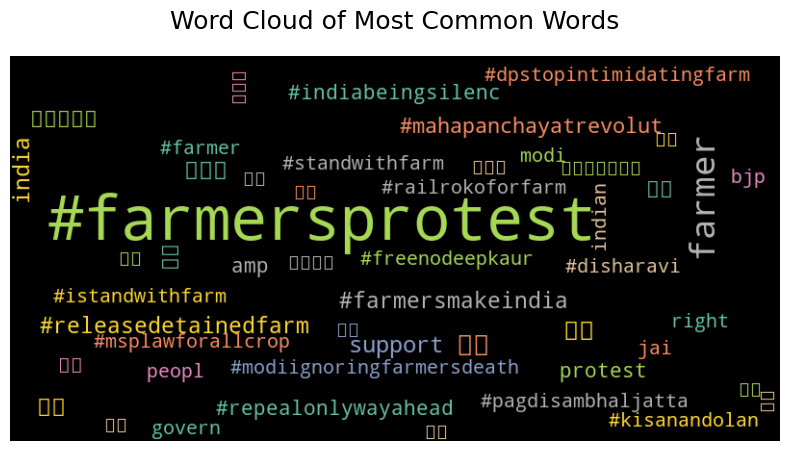

In [31]:
def create_word_cloud(word_counts, top_words):
    """
    Generate a visually appealing word cloud from word frequencies.

    Arguments:
    word_counts -- Counter object with word frequencies
    top_words -- Number of top words to display in the word cloud
    """
    
    # Get the most common words
    most_common_words = word_counts.most_common(top_words)

    # Create a WordCloud object with custom settings
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='black',  # Dark background for contrast
        colormap='Set2',           # Color palette for the words
        max_words=top_words,       # Maximum number of words to display
    ).generate_from_frequencies(dict(most_common_words))

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Remove axis
    plt.title('Word Cloud of Most Common Words', fontsize=18, color='black', pad=20)
    plt.show()
# Use the word counts from the earlier analysis
create_word_cloud(word_counts, 50)


Named Entities

In [39]:
def entity_recognition_nltk(tweet_index):
    entities = []
    for content in tweet_index.values():
        words = nltk.word_tokenize(content)
        pos_tags = nltk.pos_tag(words)  # POS tagging
        tree = nltk.ne_chunk(pos_tags, binary=True)  # Named entity recognition

        for subtree in tree:
            if hasattr(subtree, 'label') and subtree.label() == 'NE':  # Named entities
                entity = " ".join([word for word, tag in subtree])
                entities.append(entity)
    return entities

named_entities = entity_recognition_nltk(tweet_index)
print("Named entities:", named_entities)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Usuari\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Usuari\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


Named entities: ['Indian', 'India', 'FarmersProtest', 'FreeNodeepKaur', 'FarmersProtest', 'ModiDontSellFarmers', 'India', 'WILL', 'FarmersProtest', 'ReallySwara', 'NoFarmersNoFood', 'FarmersProtest', 'NoFarmersNoFood', 'Jai', 'FarmersProtest', 'ModiIgnoringFarmersDeaths', 'FarmersProtest', 'NoFarmersNoFood', 'FarmersProtest', 'FarmersProtest', 'NoFarmersNoFood', 'Malkeet Singh', 'Mahilpur', 'Hoshiarpur', 'Delhi', 'FarmersProtest', 'Jai', 'FarmersProtest', 'FarmersProtest', 'FarmersProtest', 'FarmersProtest', 'NoFarmersNoFood', 'FarmersProtest', 'ModiHaiToMehngaiHai', 'FarmersProtest', 'Mockery', 'FarmersProtest', 'ArmaanMalik22', 'FarmersProtest', 'FarmersProtest', 'FarmersProtest', 'NoFarmersNoFood', 'Modi', 'FarmersProtest', 'ShekharGupta', 'FarmersProtest', 'Diversity', 'BeingHuman', 'Malkeet Singh', 'Mahilpur', 'Hoshiarpur', 'Delhi', 'FarmersProtest', 'FarmersProtest', 'FarmersProtest', 'کسان', 'تحریک', 'حکومت', 'پارلیمنٹ کے', 'FarmersProtest', 'FarmLaws', 'FarmersProtest', 'Farmer

In [41]:
def display_entities(entities):
    # Count the unique named entities
    unique_entities = set(entities)
    entity_count = len(unique_entities)
    
    # Print the count of unique named entities
    print(f"Total unique named entities found: {entity_count}\n")
    
    # Print each unique entity
    print("Unique Named Entities:")
    for entity in unique_entities:
        print(f"- {entity}")

display_entities(named_entities)

Total unique named entities found: 23132

Unique Named Entities:
- Saudi Arabia
- DevilOnline24 Ha
- Paranoid
- Thirty Hazare Court
- ALL Social Media
- Flaunt
- NEW VIDEO
- FarmersProtest Thanks
- TaraGandhi
- TO STAY
- Pakistan Military Lands
- SatyaHindi
- Loud
- Environmentalist
- Assets
- Gender Equality Protest
- YEAR
- MehekF
- BJP Fascist
- Gurwin Singh Ahuja
- Helm
- IStandWithFarmers Sedition
- Pagrhi Sambhal Jatta
- Singhu Border Protest Site
- Wowww
- FarmersProtest Okk
- Company
- iParwinder
- Bete
- Haryana CM Manohar Lal Khattar
- DieselPriceHike No
- GretaGoToSchool
- Main Kisan Hoon
- Bitter Truth
- आपस
- FarmersPRotest
- ਕਲਮ
- India Support Farmers
- Incase
- Munavar Rana
- Lingayat
- haloFolded
- Tractor2twitr Totally
- DamanVirodhiDiwas
- INCIndiaLive
- आज कल
- RajatSharmaLive Dalal Godi Media
- Thanx Khalsa Aid
- Delhi HC
- DeepakMittal
- Are Greta And Rihanna
- Lah
- Att
- IndiaForSikhs
- SFJ Counsels To Declare Independence
- Jorawar Singh Ji
- हम
- Bhaji
- Pover